# Sharpe Ratio - Introduction


Sharpe Ratio is the most common metric used to measure risk in finance.

The formula is 

> (return on portfolio - risk free rate)/standard deviation of the excess return on the portfolio

There are tons of resources on the internet about sharpe ratio.

[This investopedia page](https://www.investopedia.com/terms/s/sharperatio.asp) is a good introduction.

In this series of articles, we take a deep dive into the sharpe ratio and its variations and usage.

We assume the risk free rate to be zero, then the formula simply becomes mean returns divided by the standard deviation of returns. The following terms are used interchangebly throughout this article

 * mean returns/average returns/mu
 * standard deviation of returns/deviation/sigma

We would be working on the NSE Nifty 50 index data

In [1]:
import numpy as np
import pandas as pd
import empyrical as ep
from typing import Tuple
import seaborn as sns
sns.set()

In [2]:
# Parameters 
# useful when running as a papermill notebook

filename:str = '/tmp/nifty.csv'
periods:Tuple[str] = ('W','M','Y')

In [3]:
df = pd.read_csv(filename, index_col=['date'], parse_dates=['date'])
df['daily_return'] = df.close.pct_change()
df.head()

,open,high,low,close,daily_return
date,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,NaN
2000-01-04,1594.40,1641.95,1594.40,1638.7,0.029205
2000-01-05,1634.55,1635.50,1555.05,1595.8,-0.026179
2000-01-06,1595.80,1639.00,1595.80,1617.6,0.013661
2000-01-07,1616.60,1628.25,1597.20,1613.3,-0.002658


In [4]:
mu,sigma = df.daily_return.mean(), df.daily_return.std()
print(f"Daily mean return = {mu :.4f}")
print(f"Deviation of daily returns = {sigma :.4f}")
print(f"Sharpe ratio = {mu/sigma :.4f}")


Daily mean return = 0.0005
Deviation of daily returns = 0.0144
Sharpe ratio = 0.0381


## Sharpe ratio - converting to various periods

The sharpe ratio calculated here is based on daily return. To calculate it for other periods, multiply this by the square root of the period.

`sharpe ratio * √n`

To get the weekly sharpe ratio, multiply by √5 since there are 5 trading days in a week, √20 for a month and so on. Most of the literature and news display the annualized sharpe ratio, sharpe ratio per annum

<!-- TEASER_END -->

In [5]:
def sharpe_period(sr:float, n:int)->float:
    sr_p = sr*np.sqrt(n)
    return sr_p

for p,n in zip(('weekly','monthly','yearly'),(5,20,252)):
    print(f"Sharpe ratio for the period {p} is {sharpe_period(mu/sigma, n):.4f}")
    
print(f"Sharpe ratio annualized calculated using empyrical is {ep.sharpe_ratio(df.daily_return):.4f}")

Sharpe ratio for the period weekly is 0.0851
Sharpe ratio for the period monthly is 0.1703
Sharpe ratio for the period yearly is 0.6044
Sharpe ratio annualized calculated using empyrical is 0.6044


### Calculate sharpe ratio by resampling

In [6]:
def resampled_sharpe(dataframe:pd.DataFrame, freq:str)->float:
    resampled = dataframe.resample(freq).close.last().pct_change()
    sharpe = resampled.mean()/resampled.std()
    return sharpe

for p,n in zip(('weekly','monthly','yearly'),periods):
    print(f"Sharpe ratio for the period {p} is {resampled_sharpe(df, n):.4f}")


Sharpe ratio for the period weekly is 0.0852
Sharpe ratio for the period monthly is 0.1752
Sharpe ratio for the period yearly is 0.5821


The sharpe ratio by both the methods match though not exact and bigger the timeframe, the bigger is the difference between the methods. This may be due to the fact that the daily returns have more data compared to the resampled series which has got less data when we increase the time period.

The sharpe ratio calculated thus far is the *ex-post* sharpe ratio since it is calculated after the event has occured. In practice, we use this ratio on a *ex-ante* basis, as a predictor for the future. *ex-ante* is the the expected sharpe ratio while the *ex-post* is the actual/realised sharpe ratio

This excellent [article](https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/ex-ante-vs-ex-post/) shows how ex-post and ex-ante are calculated in general

## A note on the risk free rate

All the calculations are done assuming 0 is the risk-free rate. Let us see a simulation with different risk free rates


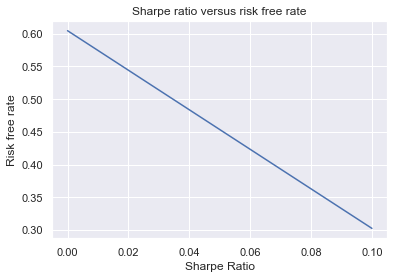

In [7]:
rates = np.linspace(0,0.1,50)
sharpe_ratios = {}
for r in rates:
    sharpe_ratios[r] = ep.sharpe_ratio(df.daily_return,risk_free=r/365)
ax = pd.Series(sharpe_ratios).plot(title='Sharpe ratio versus risk free rate')
ax.set_xlabel('Sharpe Ratio')
ax.set_ylabel('Risk free rate');
